<a href="https://colab.research.google.com/github/SOPHIEMHANNA/DATASCIENCE1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [1]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [2]:
my_list = [98, 24, 46, 87, 33]
my_series = pd.Series(my_list)
print(my_series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [4]:
my_list = [98, 24, 46, 87, 33]
my_index = range(2, len(my_list) * 3 + 2, 3)
my_series = pd.Series(my_list, index=my_index)
print(my_series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [5]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
print(df)


      Name  Age      Career
0   Sophie   18      Doctor
1      Mia   16     Teacher
2  Michael   51  Journalist
3    Mandy   50      Lawyer


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [6]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
df.index.name = 'participant_id'
print(df)

                   Name  Age      Career
participant_id                          
0                Sophie   18      Doctor
1                   Mia   16     Teacher
2               Michael   51  Journalist
3                 Mandy   50      Lawyer


6. Use a pandas function to determine the data types of the columns of `df`.

In [10]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
df.index.name = 'participant_id'
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [11]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
df.index.name = 'participant_id'
name_column = df['Name']
print(name_column)

participant_id
0     Sophie
1        Mia
2    Michael
3      Mandy
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [13]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
df.index.name = 'participant_id'
name_column = df.Name
print(name_column)

participant_id
0     Sophie
1        Mia
2    Michael
3      Mandy
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [14]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
name_df = df[['Name']]
print(name_df)

      Name
0   Sophie
1      Mia
2  Michael
3    Mandy


9. Show the 3rd element in column `career`.

In [15]:
data = {
    'Name': ['Sophie', 'Mia', 'Michael', 'Mandy'],
    'Age': [18, 16, 51, 50],
    'Career': ['Doctor', 'Teacher', 'Journalist', 'Lawyer']
}

df = pd.DataFrame(data)
third_career = df['Career'].iloc[2]
print(third_career)

Journalist


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [16]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [18]:
iris = sns.load_dataset('iris')
correlation = iris['sepal_length'].corr(iris['sepal_width'])
print("Correlation between the variables sepal_length and sepal_width:", correlation)

Correlation between the variables sepal_length and sepal_width: -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [24]:
correlation_by_species = iris.groupby('species').apply(lambda x: x['sepal_length'].corr(x['sepal_width']))

max_correlation_species = correlation_by_species.idxmax()
max_correlation_value = correlation_by_species.max()

print("Species with the highest correlation between sepal_length and sepal_width:", max_correlation_species)
print("Correlation value:", max_correlation_value)

Species with the highest correlation between sepal_length and sepal_width: setosa
Correlation value: 0.7425466856651597


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [28]:
import seaborn as sns

iris = sns.load_dataset('iris')

overall_correlation = iris.corr().unstack().sort_values()

min_correlation_overall = overall_correlation[overall_correlation != 1].head(1)

print("Overall: Variables with the most negative correlation:")
print(min_correlation_overall)

correlation_by_species = iris.groupby('species').apply(lambda x: x.corr().unstack().sort_values())

min_correlation_by_species = correlation_by_species[correlation_by_species != 1].groupby(level=0).head(1)

print("\nFor each species: Variables with the most negative correlation:")
print(min_correlation_by_species)

Overall: Variables with the most negative correlation:
sepal_width  petal_length   -0.42844
dtype: float64

For each species: Variables with the most negative correlation:
species                               
setosa      sepal_width   petal_length    0.177700
versicolor  sepal_length  sepal_width     0.525911
virginica   sepal_length  petal_width     0.281108
dtype: float64


<ipython-input-28-bd310a480758>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  overall_correlation = iris.corr().unstack().sort_values()
<ipython-input-28-bd310a480758>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_by_species = iris.groupby('species').apply(lambda x: x.corr().unstack().sort_values())


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


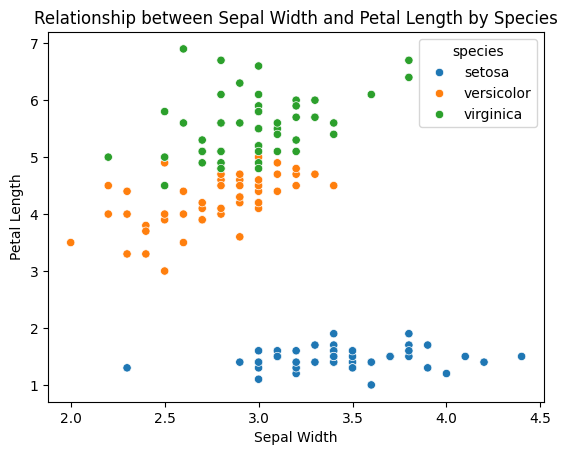

In [31]:
import matplotlib.pyplot as plt

sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='species')
plt.title('Relationship between Sepal Width and Petal Length by Species')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.show()

This phenomenon occurs when the correlation between two variables change either direction or strength when the data changes based on a third variable. For example. If you were to mix all 3 flowers together, the outcome would be wider petals are asociated with shorter petals. But then looking at the flowers seperatly, wider petals are actuall associated with longer petals. When you end up mixing each flower, with it's own characteristics, it can change the overall big picture.